In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix_content_2023.csv')

In [3]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [4]:
df.shape

(24812, 6)

In [5]:
df.dtypes

Title                  object
Available Globally?    object
Release Date           object
Hours Viewed           object
Language Indicator     object
Content Type           object
dtype: object

In [6]:
df['Hours Viewed'] = df['Hours Viewed'].replace(',',"", regex=True).astype(float)

In [7]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie


In [8]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
cat_cols

['Title',
 'Available Globally?',
 'Release Date',
 'Language Indicator',
 'Content Type']

In [9]:
for col in cat_cols:
    print(df[col].unique(), end = "\n\n")

['The Night Agent: Season 1' 'Ginny & Georgia: Season 2'
 'The Glory: Season 1 // 더 글로리: 시즌 1' ... 'Terror y Feria: Season 1'
 'The Witcher: A Look Inside the Episodes: Limited Series'
 'We Are Black and British: Season 1']

['Yes' 'No']

['2023-03-23' '2023-01-05' '2022-12-30' ... '2023-12-04' '2023-12-21'
 '2015-12-04']

['English' 'Korean' 'Non-English' 'Japanese' 'Hindi' 'Russian']

['Show' 'Movie']



In [10]:
df[['Title','Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


In [11]:
content_viewership = df.groupby('Content Type')['Hours Viewed'].sum()
content_viewership

Content Type
Movie    5.063780e+10
Show     1.077641e+11
Name: Hours Viewed, dtype: float64

Text(0, 0.5, 'Total Hours Viewed')

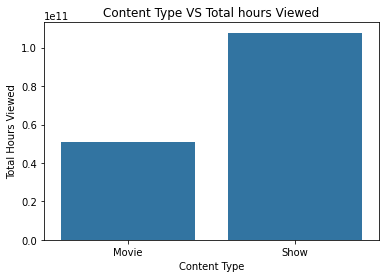

In [12]:
sns.barplot(x=content_viewership.index, y=content_viewership.values)
plt.title('Content Type VS Total hours Viewed')
plt.xlabel('Content Type')
plt.ylabel('Total Hours Viewed')

In [13]:
lang_viewership = df.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)
lang_viewership

Language Indicator
English        1.244417e+11
Korean         1.537840e+10
Non-English    1.043910e+10
Japanese       7.102000e+09
Hindi          9.261000e+08
Russian        1.146000e+08
Name: Hours Viewed, dtype: float64

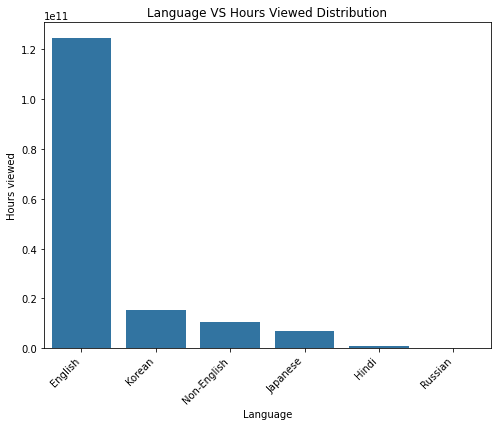

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x = lang_viewership.index, y=lang_viewership.values)
plt.title("Language VS Hours Viewed Distribution")
plt.xlabel("Language",)
plt.xticks(rotation = 45, ha='right')
plt.ylabel("Hours viewed")
plt.show()

In [15]:
#Now we'll analyze the viewes on the basis of dates, 1st convert the release date into datetime format adn extract month
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Release Month'] = df['Release Date'].dt.month

In [16]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11.0
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5.0


In [17]:
# Now we'll check in which month mostly viwed hours
monthly_viewes = df.groupby('Release Month')['Hours Viewed'].sum()
monthly_viewes

Release Month
1.0     7.271600e+09
2.0     7.103700e+09
3.0     7.437100e+09
4.0     6.865700e+09
5.0     7.094600e+09
6.0     8.522000e+09
7.0     6.524800e+09
8.0     6.817800e+09
9.0     7.262200e+09
10.0    8.123200e+09
11.0    7.749500e+09
12.0    1.005580e+10
Name: Hours Viewed, dtype: float64

In [18]:
month_names = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'Apr', 5.0: 'May', 6.0: 'Jun',
               7.0: 'Jul', 8.0: 'Aug', 9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}

month_labels = [month_names[int(month)] for month in monthly_viewes.index]

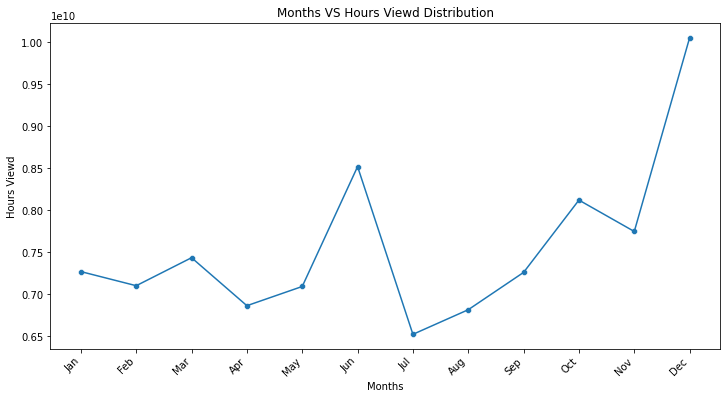

In [19]:
plt.figure(figsize=(12,6))
sns.lineplot(x=month_labels, y=monthly_viewes.values)
sns.scatterplot(x=month_labels, y=monthly_viewes.values)
plt.title("Months VS Hours Viewd Distribution")
plt.xlabel("Months")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Hours Viewd")
plt.show()

In [20]:
title_viewed = df.groupby('Title')['Hours Viewed'].sum().sort_values(ascending=False)
title_viewed

Title
The Night Agent: Season 1                          967600000.0
Ginny & Georgia: Season 2                          731300000.0
The Glory: Season 1 // 더 글로리: 시즌 1                 689700000.0
Wednesday: Season 1                                670400000.0
King the Land: Limited Series // 킹더랜드: 리미티드 시리즈    665400000.0
                                                      ...     
The Message // 風聲 // 风声                               100000.0
The Messenger // Kurier                               100000.0
Amadeus                                               100000.0
Alzheimer's // زهايمر                                 100000.0
Bluebeard // 해빙                                       100000.0
Name: Hours Viewed, Length: 19158, dtype: float64

In [21]:
#Extracting the top 5 titles based on hours viewed
top_five = df.nlargest(5, 'Hours Viewed')
top_five
#From the below we can conclude that most viewes comes on the shows than Movies

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,Yes,2023-06-17,630200000.0,Korean,Movie,6.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0
18214,ONE PIECE: Season 1,Yes,2023-08-31,541900000.0,English,Show,8.0


In [22]:
monthly_Viewes_by_Type = df.pivot_table(index='Release Month', columns="Content Type", values= "Hours Viewed",aggfunc='sum')
monthly_Viewes_by_Type

Content Type,Movie,Show
Release Month,,
1.0,2.275900e+09,4.995700e+09
2.0,1.654400e+09,5.449300e+09
3.0,2.109400e+09,5.327700e+09
4.0,2.757600e+09,4.108100e+09
5.0,2.520500e+09,4.574100e+09
6.0,3.135800e+09,5.386200e+09
7.0,1.615700e+09,4.909100e+09
8.0,2.186400e+09,4.631400e+09
9.0,2.092300e+09,5.169900e+09


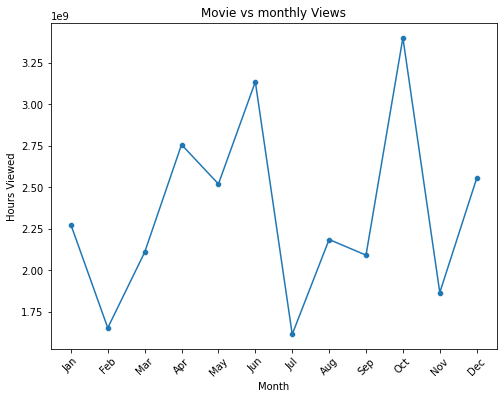

In [23]:
plt.figure(figsize=(8,6))
sns.lineplot(x=month_labels,y=monthly_Viewes_by_Type['Movie'].values)
sns.scatterplot(x=month_labels,y=monthly_Viewes_by_Type['Movie'].values)
plt.title('Movie vs monthly Views')
plt.xlabel('Month')
plt.ylabel('Hours Viewed')
plt.xticks(rotation=45)
plt.show()

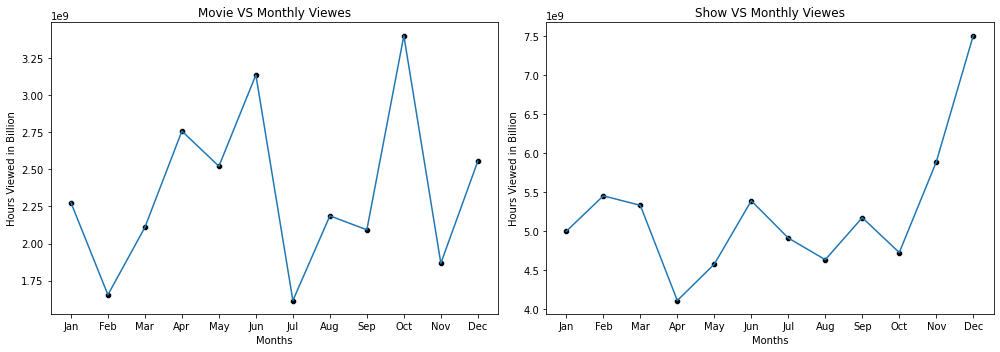

In [24]:
fig, axes = plt.subplots(1,2, figsize=(14,5))
sns.lineplot(x=month_labels, y=monthly_Viewes_by_Type['Movie'].values, ax=axes[0])
sns.scatterplot(x=month_labels, y=monthly_Viewes_by_Type['Movie'].values, ax=axes[0],color='black')
axes[0].set_title('Movie VS Monthly Viewes')
axes[0].set_xlabel('Months')
axes[0].set_ylabel('Hours Viewed in Billion')

sns.lineplot(x=month_labels, y=monthly_Viewes_by_Type['Show'].values, ax=axes[1])
sns.scatterplot(x=month_labels, y=monthly_Viewes_by_Type['Show'].values, ax=axes[1], color='black')
axes[1].set_title('Show VS Monthly Viewes')
axes[1].set_xlabel('Months')
axes[1].set_ylabel('Hours Viewed in Billion')
plt.tight_layout()
plt.show()

In [25]:
#Above graph shows that, SHOWS has the most viewes than the Movies. From Oct the views on SHOWS has 
# increased whereas the In June and Oct Movie has most viewed
# Now we'll check viewes according to the Season
def get_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    else:
        return 'Fall'

In [26]:
df['Release Season'] = df['Release Month'].apply(get_season)

In [27]:
df.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Release Season
0,The Night Agent: Season 1,Yes,2023-03-23,812100000.0,English,Show,3.0,Spring
1,Ginny & Georgia: Season 2,Yes,2023-01-05,665100000.0,English,Show,1.0,Winter
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0,Winter
3,Wednesday: Season 1,Yes,2022-11-23,507700000.0,English,Show,11.0,Fall
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,503000000.0,English,Movie,5.0,Spring


In [28]:
seasonal_Viewes = df.groupby('Release Season')['Hours Viewed'].sum().sort_values(ascending=True)
seasonal_Viewes

Release Season
Spring    2.139740e+10
Summer    2.186460e+10
Winter    2.443110e+10
Fall      9.070880e+10
Name: Hours Viewed, dtype: float64

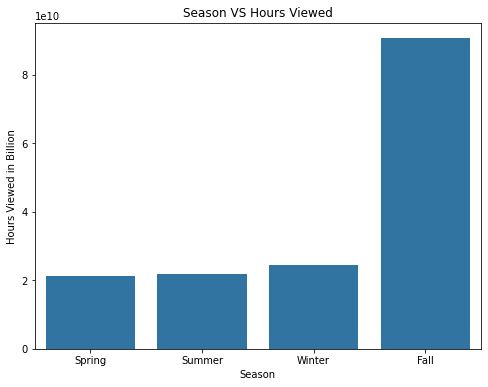

In [29]:
plt.figure(figsize=(8,6))
sns.barplot(x=seasonal_Viewes.index, y=seasonal_Viewes.values)
plt.title('Season VS Hours Viewed')
plt.xlabel('Season')
plt.ylabel('Hours Viewed in Billion')
plt.show()

In [30]:
# From the above Data Visualization we can conclude that most of the views occured in the Fall Season 
# with over 80 billion hours viewed, and other season have moderate viewes. So we can conclude that Netflix used by customer
# mostly in Fall season.
# Now we'll check numbers of the contents released in this Season

In [32]:
monthly_Release = df['Release Month'].value_counts().sort_index()
monthly_viewes

Release Month
1.0     7.271600e+09
2.0     7.103700e+09
3.0     7.437100e+09
4.0     6.865700e+09
5.0     7.094600e+09
6.0     8.522000e+09
7.0     6.524800e+09
8.0     6.817800e+09
9.0     7.262200e+09
10.0    8.123200e+09
11.0    7.749500e+09
12.0    1.005580e+10
Name: Hours Viewed, dtype: float64

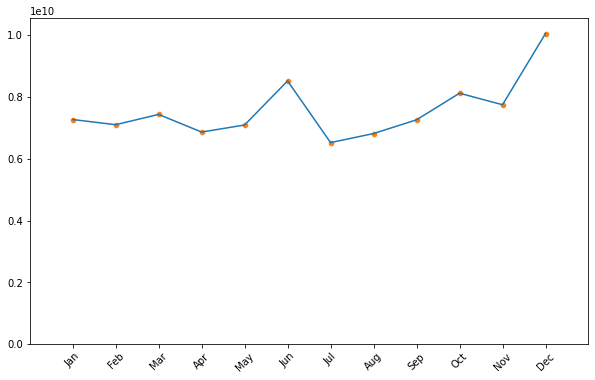

In [38]:
plt.figure(figsize=(10,6))
sns.barplot(x=month_labels,y=monthly_Release.values)
sns.lineplot(x=month_labels, y=monthly_viewes.values)
sns.scatterplot(x=month_labels,y=monthly_viewes.values)
plt.xticks(rotation=45)
plt.show()

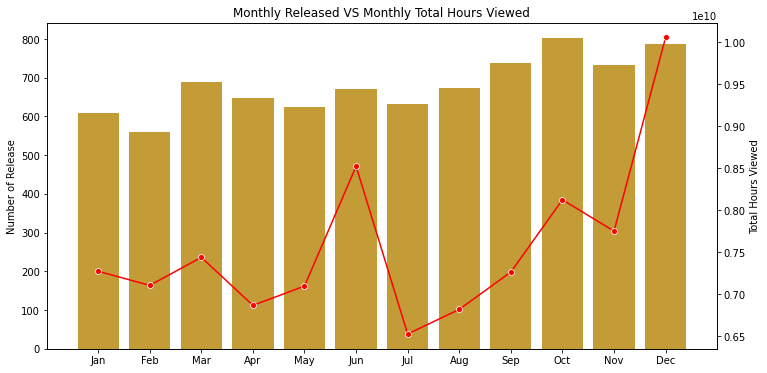

In [52]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x=month_labels,y=monthly_Release.values, color='goldenrod', ax=ax1)
ax1.set_ylabel('Number of Release', color='black')
ax2 = ax1.twinx()
sns.lineplot(x=month_labels,y=monthly_viewes.values,color='red',marker='o', ax=ax2)
ax2.set_ylabel('Total Hours Viewed',color='black')
plt.title('Monthly Released VS Monthly Total Hours Viewed')
plt.show()

In [53]:
#As you can see that no. of released is stable through out year but high Viewes in June and after that From Sept it increasing
#We can conclude that on No. of release viewes is not dependent on that but it is dependent on Time
# Now we'll explore the Netflix has the preference for releasing content on specific day

In [55]:
df['ReleaseDay'] = df['Release Date'].dt.day_name()

In [60]:
# print(df['ReleaseDay'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']))
weekday_Release = df['ReleaseDay'].value_counts().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

In [66]:
weekday_Viewership = df.groupby('ReleaseDay')['Hours Viewed'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'] )
weekday_Viewership

ReleaseDay
Monday       3.954500e+09
Tuesday      5.562300e+09
Wednesday    1.574410e+10
Thursday     2.029280e+10
Friday       3.821720e+10
Saturday     5.121800e+09
Sunday       1.935300e+09
Name: Hours Viewed, dtype: float64

Text(0.5, 1.0, 'Released Day VS Total Hours Views on Day')

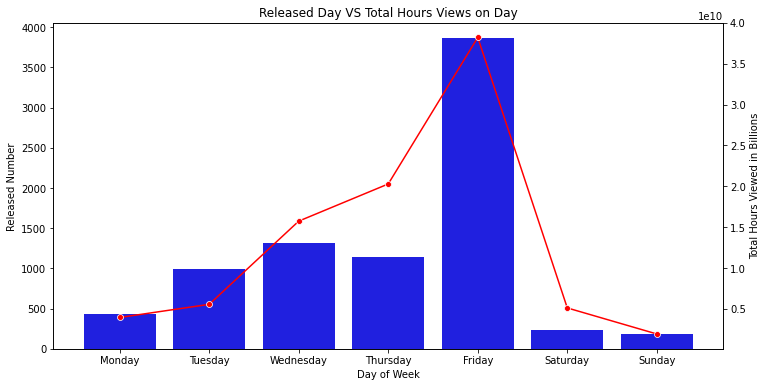

In [84]:
fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x=weekday_Release.index, y=weekday_Release.values, color='blue', ax=ax1)
ax1.set_ylabel('Released Number')
ax2 = ax1.twinx()
sns.lineplot(x=weekday_Viewership.index, y=weekday_Viewership.values,color='red',marker='o', ax=ax2)
ax2.set_ylabel('Total Hours Viewed in Billions')
ax1.set_xlabel('Day of Week')
plt.title('Released Day VS Total Hours Views on Day')

In [85]:
#As you can see above that most released content on Friday and most viewed is also on Friday. After that sharp decrease in Viewes
# on Saturday despite released new Content. So mostly Viewer watches Content on the Friday at the start of wekend, So Netflix can 
# Release the new Content mostly on the Friday, So check on Holiday's we'll do some exploration

In [86]:
important_dates = [
    '2023-01-01',  # new year's day
    '2023-02-14',  # valentine's ay
    '2023-10-31',  # halloween
    '2023-12-25'   # christmas day
]
# convert them to dates
important_dates = pd.to_datetime(important_dates)
important_dates

DatetimeIndex(['2023-01-01', '2023-02-14', '2023-10-31', '2023-12-25'], dtype='datetime64[ns]', freq=None)

In [87]:
holiday_release = df[df['Release Date'].apply(
lambda x: any((x-date).days in range(-3,4) for date in important_dates)
)]
holiday_release

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type,Release Month,Release Season,ReleaseDay
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,622800000.0,Korean,Show,12.0,Winter,Friday
6,La Reina del Sur: Season 3,No,2022-12-30,429600000.0,English,Show,12.0,Winter,Friday
11,Kaleidoscope: Limited Series,Yes,2023-01-01,252500000.0,English,Movie,1.0,Winter,Sunday
29,Perfect Match: Season 1,Yes,2023-02-14,176800000.0,English,Show,2.0,Winter,Tuesday
124,Lady Voyeur: Limited Series // Olhar Indiscret...,Yes,2022-12-31,86000000.0,Non-English,Movie,12.0,Winter,Saturday
...,...,...,...,...,...,...,...,...,...
22324,The Romantics: Limited Series,Yes,2023-02-14,1000000.0,English,Movie,2.0,Winter,Tuesday
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,Yes,2023-02-16,900000.0,Japanese,Show,2.0,Winter,Thursday
22966,The Lying Life of Adults: Limited Series // La...,Yes,2023-01-04,900000.0,English,Movie,1.0,Winter,Wednesday
22985,Community Squad: Season 1 // División Palermo:...,No,2023-02-17,800000.0,Non-English,Show,2.0,Winter,Friday


So, the content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety.
Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic 
releases around these periods. The Fall season stands out as the peak time for audience engagement.